In [44]:
#  for mathematical operations
import numpy as np 

# for dataframs operations 
import pandas as pd 

#  for data visulation 
import seaborn as sns 
import matplotlib.pyplot as plt
 
# lets select the backbround style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(16,8)



In [3]:
# for interactivity
import  as widgets
# import ipykernel 
# import  interact  import interact_maunal

SyntaxError: invalid syntax (2457714049.py, line 3)

In [5]:
data = pd.read_csv(r'C:\Users\Punit\Downloads\startup_funding.csv')



In [6]:
# To check the head of the file
data.head() 

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
# TO check th shape of the file 
data.shape

(3044, 10)

In [18]:
# Changing th enames of the colums inside the data
data.columns=['SNo','Date','StartupName','IndustryVertical','SubVertical','City','InvestorsName', 'InvestmentnType','AmountInUSD','Remarks']
# Lets clean the string :
def Clean_string(x):
    return str(x).replace('\\xc2\\xa0','').replace('\\\\xc2\\\\xa0','')

# lets apply the function to clean the data
for col in ['SNo','Date','StartupName','IndustryVertical','SubVertical','City','InvestorsName','InvestmentnType','AmountInUSD','Remarks']:
    data[col]= data[col].apply(lambda x: Clean_string(x))
    
# lets check the head of the data 

data.head()    
      
    

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentnType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [19]:
# TO check the columns of the data
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentnType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [20]:
# Missing data 

# importing warning module
import warnings
warnings.filterwarnings('ignore')



In [21]:
# lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending= False)

# lets calculate the total percentage of misiing values in the data
percentage = ((data.isnull().sum()/data.isnull().count()*100)).sort_values(ascending= False)

# lets store the above values in the data set called missing data
missing_data= pd.concat([total,percentage],axis=1,keys=['Total','Percent%'])

# lets check the head of the data
missing_data 

,Total,Percent%
SNo,0,0.0
Date,0,0.0
StartupName,0,0.0
IndustryVertical,0,0.0
SubVertical,0,0.0
City,0,0.0
InvestorsName,0,0.0
InvestmentnType,0,0.0
AmountInUSD,0,0.0
Remarks,0,0.0


In [23]:
# lets chack te values in the remark colum
data['Remarks'].value_counts()

nan                                  2625
Series A                              177
Series B                               64
Pre-Series A                           37
Series C                               28
                                     ... 
pre Series-A                            1
QPrize Contest Winners                  1
pre series A                            1
pre-series A                            1
Strategic Funding, Minority stake       1
Name: Remarks, Length: 70, dtype: int64

In [25]:
# lets remove the remark colum 
data= data.drop(['Remarks'],axis = 1)

# lets check the colum name
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentnType', 'AmountInUSD'],
      dtype='object')

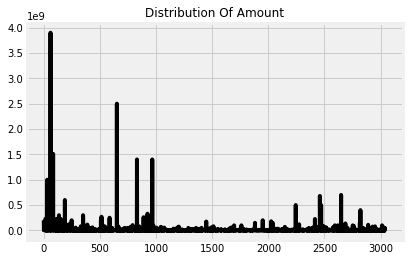

In [26]:
# lets convert the amount colums into numercical so that we can analyze the value inside it 

# function to clar the amount 
def clean_amount(x):
    x= ''.join([c for  c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x= str(x).lower().replace("n/a","")
    if x == '':
        x= "-999"
    return x

# lets apply the function on the column
data['AmountInUSD'] = data['AmountInUSD'].apply(lambda x : float(clean_amount(x)))

# lets check the head of the column after cleaning it 

plt.rcParams['figure.figsize']=(15,7)
data['AmountInUSD'].plot(kind= 'line',color = "black")
plt.title('Distribution Of Amount',fontsize = 12)
plt.show()

In [27]:
# cleaning the dates 
data['Date'][data['Date'] =='12/05.2015']='12/05/2015'
data['Date'][data['Date']=='13/04.2015']='13/04/2015'
data['Date'][data['Date']=='15/05.2015']='15/05/2015'
data['Date'][data['Date']=='22/01.2015']='22/01/2015'
data['Date'][data['Date']=='05/072018']='05/07/2018'
data['Date'][data['Date']=='01/07.2015']='01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/07/2015']='10/07/2015'






In [28]:
# lets check the maximun funding of a startup
print('Maximun funding to a Startup is :',data['AmountInUSD'].dropna().sort_values().max())

Maximun funding to a Startup is : 3900000000.0


In [29]:
# startup with minimum fnnding 
print('Minimun amount to a Startup is : ',data['AmountInUSD'].dropna().sort_values().min())

Minimun amount to a Startup is :  -999.0


In [30]:
# lets check the startups with more than 50+crore funding 
@interect

def check(column = 'AmountInUSD',x = 500000000):
    return data[data[column]> x].sort_values(by = 'AmountInUSD',ascending = False)

In [32]:
# lets check the different ventures of paytm
data[data.StartupName == 'Paytm']


,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentnType,AmountInUSD
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02


In [36]:
# lets check the startup with least funding 
data[['StartupName','AmountInUSD']].sort_values(by = 'AmountInUSD',ascending = True).head(20)

,StartupName,AmountInUSD
2125,Splitkart,-999.0
1464,TAC Security,-999.0
708,FableStreet,-999.0
709,Monsoon Fintech,-999.0
710,MonkeyBox,-999.0
1463,Fitternity,-999.0
2166,STAGE 3,-999.0
713,Creator\\xe2\\x80\\x99s Gurukul,-999.0
2465,LoanCircle,-999.0
1461,Zzungry,-999.0


In [39]:
# lets check the number of statuup with no funding 
data[data['AmountInUSD']== -999.0].shape

(971, 9)

In [47]:
# Average funding 
print(' Average funding :',data['AmountInUSD'].dropna().sort_values.mean())

AttributeError: 'function' object has no attribute 'mean'

 Total startup funded : 2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Name: StartupName, dtype: int64


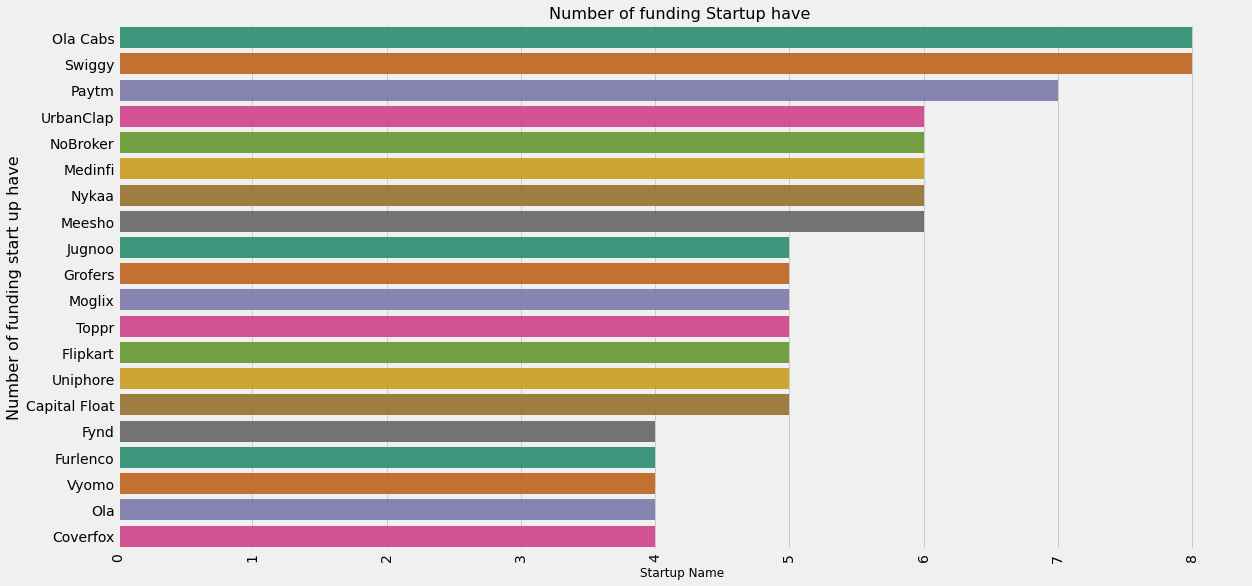

In [59]:
# lets check the no. of funding each startup got 
print(' Total startup funded :', len(data['StartupName'].unique()))
print(data['StartupName'].value_counts().head(5))
startupname = data['StartupName'].value_counts().head(20)

# plot of the 

plt.rcParams['figure.figsize']=(18,9)
sns.barplot(y = startupname.index,x = startupname.values,alpha= 0.9,palette= 'Dark2')
plt.xticks(rotation ='vertical')
plt.xlabel('Startup Name', fontsize = 12)
plt.ylabel('Number of funding start up have',fontsize = 16)
plt.title('Number of funding Startup have ', fontsize = 16)
plt.show ()

Consumer Internet       941
Technology              478
eCommerce               186
 Consumer Technology    171
Healthcare               70
Finance                  62
ECommerce                61
Logistics                32
E-Commerce               29
Education                24
Name: IndustryVertical, dtype: int64


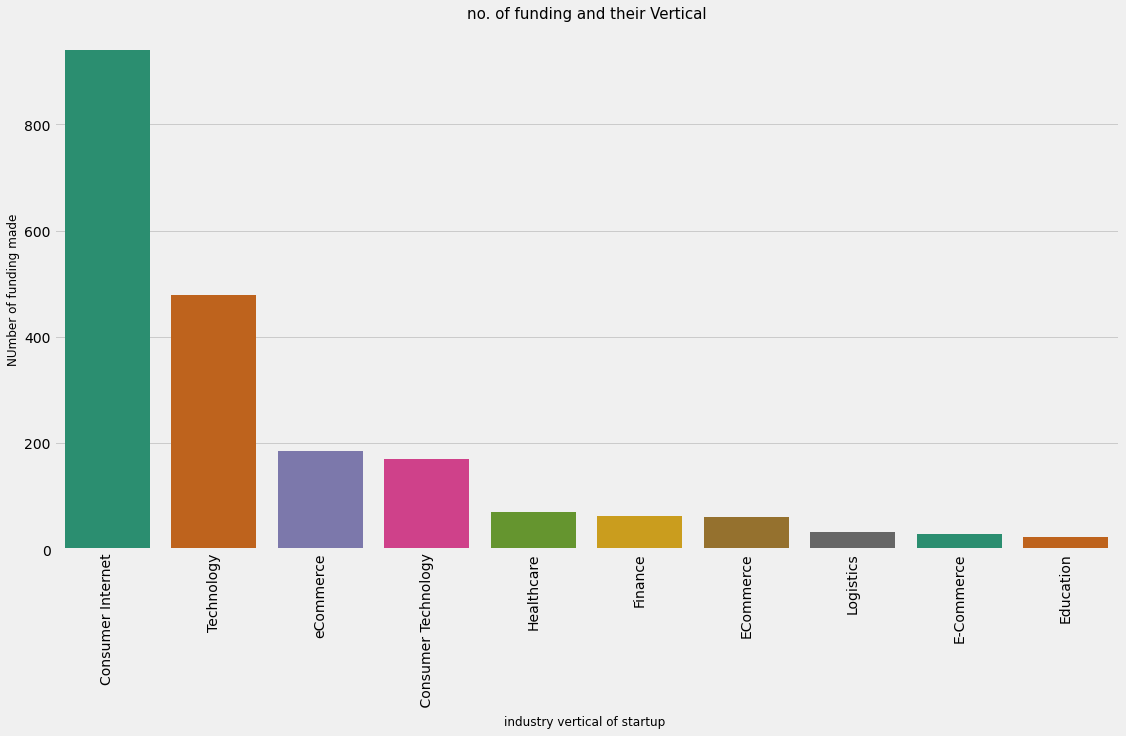

In [67]:
# lest analyze the industries of the startups 

# data cleaning
data['IndustryVertical']= data['IndustryVertical'].replace('nan',' Consumer Technology')

industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize']=(17,9)
sns.barplot(x = industry.index,y = industry.values,palette= 'Dark2')
plt.xlabel('industry vertical of startup ',fontsize = 12)
plt.ylabel('NUmber of funding made ',fontsize = 12)
plt.title('no. of funding and their Vertical',fontsize = 15)
plt.xticks( rotation = 'vertical')
plt.show()

Online Lending Platform      11
Online Pharmacy              10
Food Delivery Platform        8
Online Learning Platform      5
Online Education Platform     5
Online Lending                5
Online lending platform       5
Education                     5
Name: SubVertical, dtype: int64


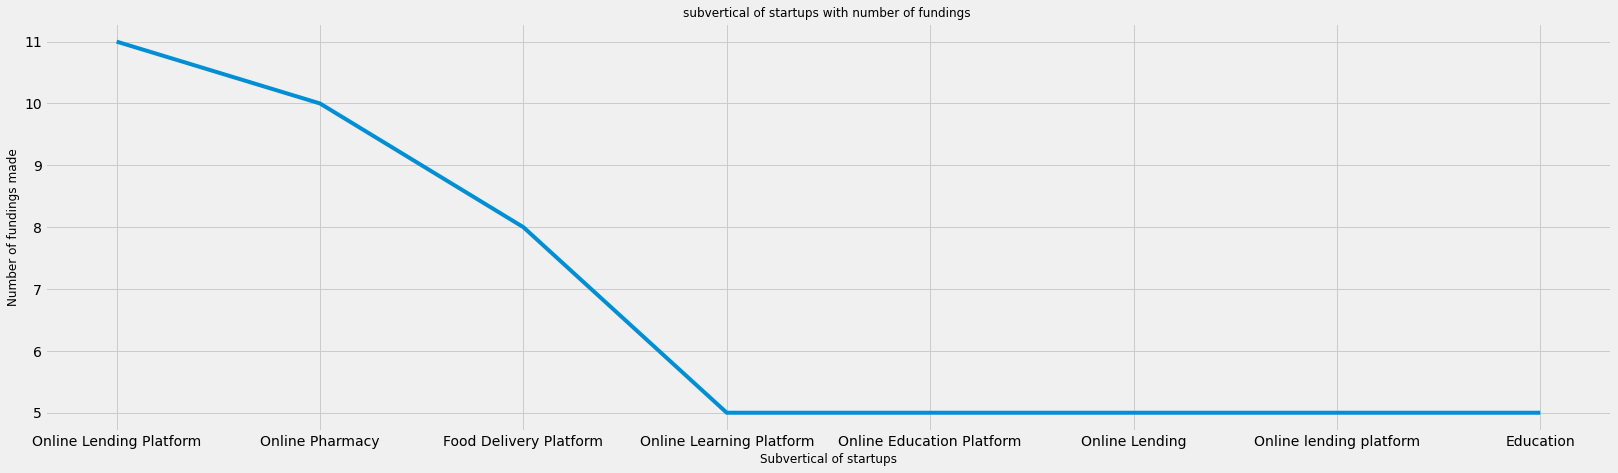

In [100]:
# lets analyze the sub vertical industries
indusrty2 = data['SubVertical'].value_counts()[1:].head(8)
print(indusrty2)

# ploting the graph 
plt.rcParams['figure.figsize']= (25,7)
sns.lineplot( x=indusrty2.index, y = indusrty2.values,palette='winter')
plt.xlabel('Subvertical of startups',fontsize = 12)
plt.ylabel('Number of fundings made',fontsize = 12)
plt.title('subvertical of startups with number of fundings ',fontsize = 12)
plt.show()

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


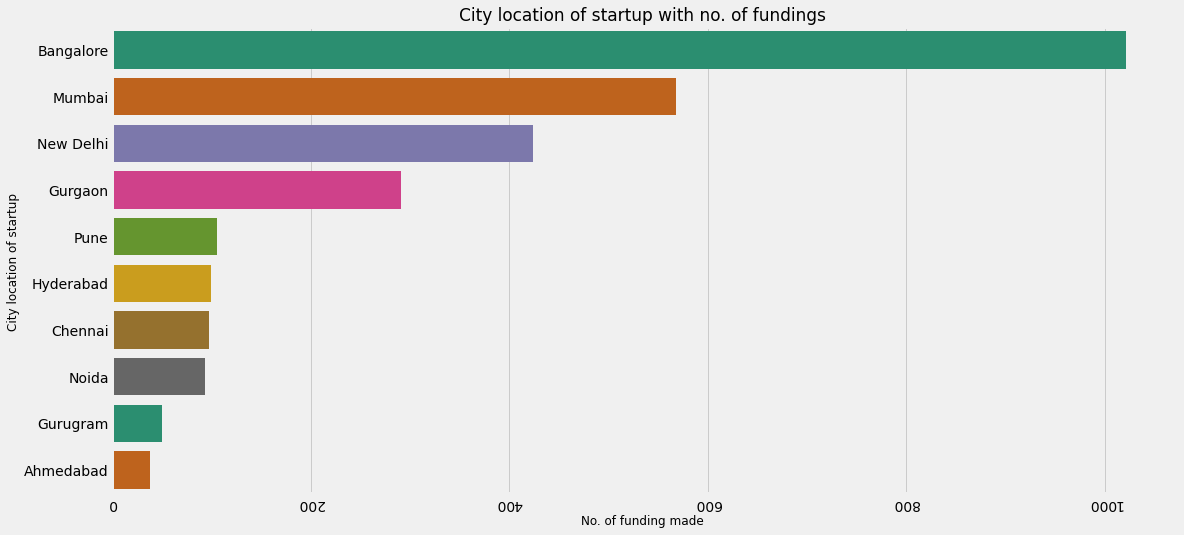

In [95]:
data['City']=data['City'].replace("Banglore","Bangalore")

city = data['City'].value_counts().head(10)
print(city)

# lets plot the data
plt.rcParams['figure.figsize']=(17,8)
sns.barplot(y= city.index,x= city.values, palette = 'Dark2')
plt.ylabel('City location of startup ',fontsize = 12)
plt.xlabel('No. of funding made ',fontsize = 12)
plt.title('City location of startup with no. of fundings ',fontsize = 17)
plt.show()


In [108]:
from wordcloud import wordcloud

name = data['InvestorsName'][~pd.isnull(data['InvestorsName'])]
wordcloud = wordcloud(max_font_size = 50,width = 600,height = 300,background_color= 'cyan').generate(''.join(name))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('world for Investor Names',fontsize= 35)
plt.axis('off')
plt.show() 


TypeError: 'module' object is not callable

Undisclosed Investors       104
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Undisclosed Investor         12
Brand Capital                11
Venture Catalysts            11
Name: InvestorsName, dtype: int64


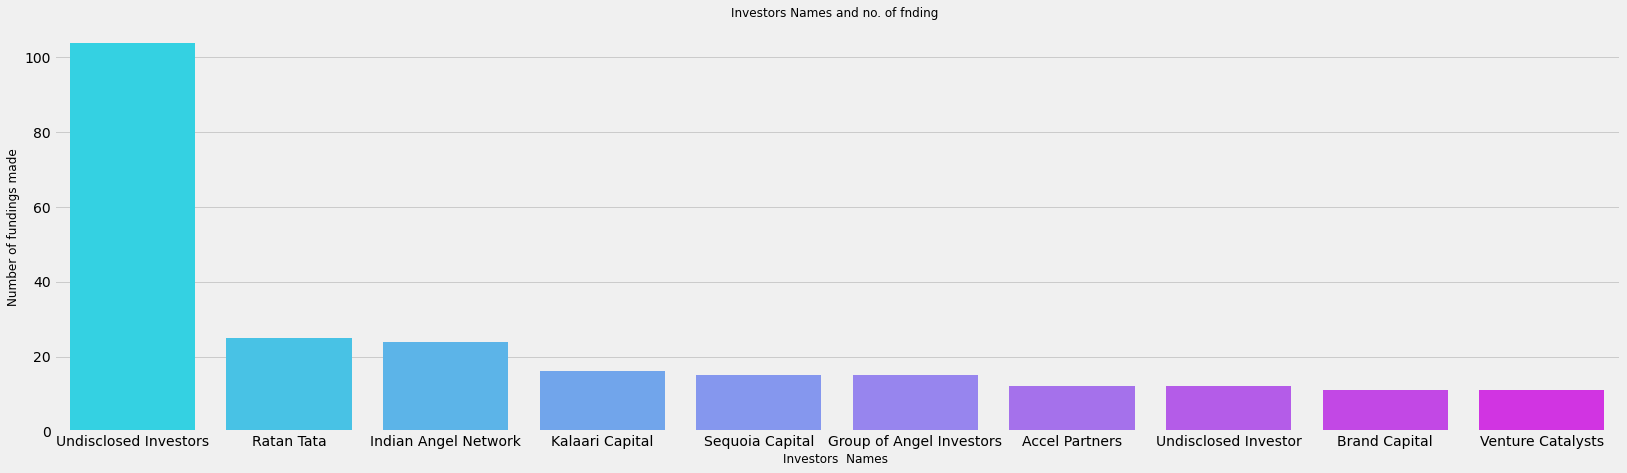

In [111]:
# lest analyse the Investors on startups
data['InvestorsName'][data['InvestorsName']== 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']== 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']== 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']== 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']== 'Undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName']== 'nan'] = 'Undisclosed Investors'

# lets check the value counts 
investors = data['InvestorsName'].value_counts().head(10)
print(investors)

# lets plot the graph 
sns.barplot(x = investors.index, y= investors.values,palette= 'cool')
plt.xlabel('Investors  Names ',fontsize= 12)
plt.ylabel('Number of fundings made',fontsize= 12)
plt.title('Investors Names and no. of fnding ',fontsize= 12)
plt.show()



Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentnType, dtype: int64


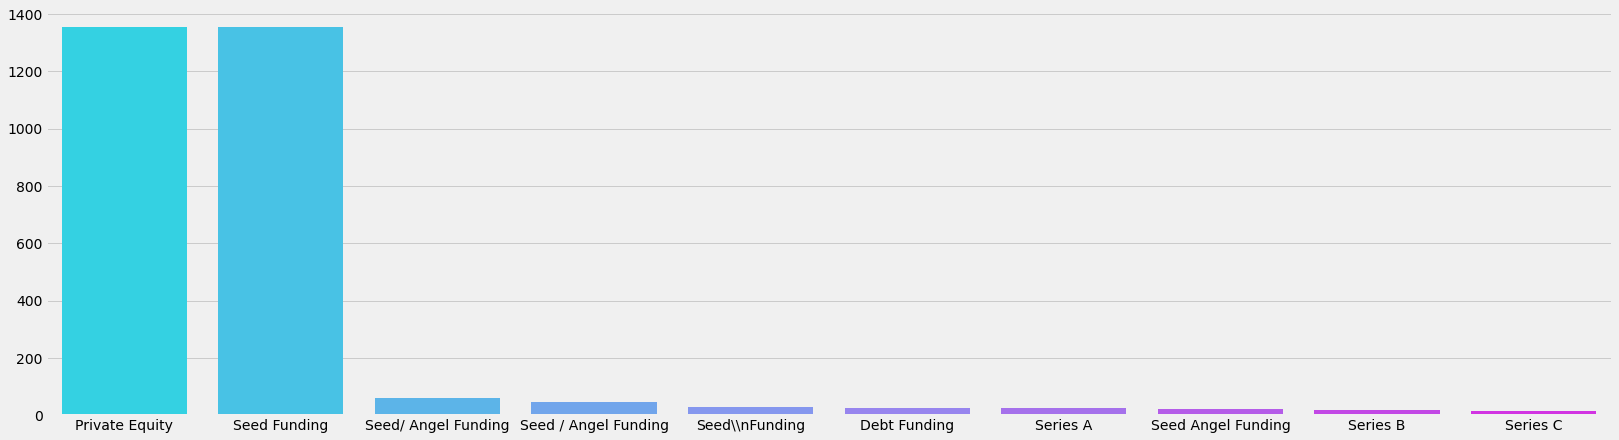

In [123]:
# lets analyze the data
investments = data['InvestmentnType'].value_counts().head(10)
print(investments)

# lets clean the data
data['InvestmentnType'][data['InvestmentnType'] == 'Private Equity'] = 'Private Equity'
data['InvestmentnType'][data['InvestmentnType'] == 'Seed Funding'] = 'Seed Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'Seed/Angel Funding'] = 'Seed Angel Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'Seed\\nFunding'] = 'Seed Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'Debt Funding'] = 'Debt Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'Series A '] = 'Series A'
data['InvestmentnType'][data['InvestmentnType'] == 'Seed/Angel Funding '] = 'Seed Angel Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'Series B '] = 'Series B'
data['InvestmentnType'][data['InvestmentnType'] == 'Series C '] = 'Secries C'


# lets plot the graph 
sns.barplot(x = investments.index, y= investments.values,palette= 'cool')
plt.xlabel('',fontsize = 12)
plt.ylabel('',fontsize = 12)
plt.title('',fontsize = 12)
plt.show()
